In [42]:
# Kaggle competition - PUBG

# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import datasets, linear_model
warnings.filterwarnings("ignore")

# Select current path
PATH = os.path.abspath('')
INPUT_PATH = os.path.join(PATH, 'data')

# Read file
df_train = pd.read_csv(INPUT_PATH + '/train_V2.csv').dropna(subset=['winPlacePerc'])
df_test = pd.read_csv(INPUT_PATH + '/test_V2.csv')
col_names = list(df_train.columns.values)
print(col_names)

['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc']


In [45]:
# Split the data into training/testing sets
df_X_train =  df_train.loc[:, df_train.columns != 'winPlacePerc'].drop(columns=['Id', 'groupId', 'matchId', 'matchType', 'rideDistance',
                                                                                'swimDistance', 'walkDistance', 'longestKill', 'damageDealt'])
df_y_train = df_train['winPlacePerc']

print(df_X_train.info())
print(df_X_train.describe())
print(df_X_train.isnull().values.any())
print(df_X_train.isna().sum())
print("---------------------------------------")
print(df_y_train.describe())
print(df_y_train.isnull().values.any())
print(df_y_train.isna().sum())

# Split the targets into training/testing sets
df_ids = df['Id']
df_X_test =  df_test.loc[:, df_train.columns != 'winPlacePerc'].drop(columns=['Id', 'groupId', 'matchId', 'matchType', 'rideDistance', 
                                                                               'swimDistance', 'walkDistance', 'longestKill', 'damageDealt'])



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 19 columns):
assists            int64
boosts             int64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
matchDuration      int64
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
roadKills          int64
teamKills          int64
vehicleDestroys    int64
weaponsAcquired    int64
winPoints          int64
dtypes: int64(19)
memory usage: 678.6 MB
None
            assists        boosts         DBNOs  headshotKills         heals  \
count  4.446965e+06  4.446965e+06  4.446965e+06   4.446965e+06  4.446965e+06   
mean   2.338150e-01  1.106908e+00  6.578757e-01   2.268196e-01  1.370148e+00   
std    5.885731e-01  1.715794e+00  1.145743e+00   6.021553e-01  2.679982e+00   
min    0.000000e+00  0.000000e+00  0.000000e+0

IndexError: Item wrong length 29 instead of 28.

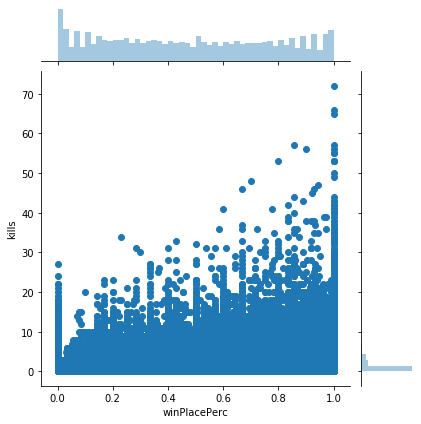

In [5]:
# EDA
# Relationship between place percentile and kills
sns.jointplot(x="winPlacePerc", y="kills", data=df_train)
plt.show()

In [6]:
# Pair-wise comparison
sns.pairplot(df)
plt.show()

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002B87F7FA158> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002B87F805AE8> (for post_execute):


KeyboardInterrupt: 

In [56]:
## Regression
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)
df_pred = pd.DataFrame(df_y_pred)

# Generate file
frames = [df_ids, df_pred]

#concatenate dataframes
df = pd.concat(frames, axis=1, sort=False)
df.columns =   ['Id','winPlacePerc']
df.to_csv('submission_test.csv', index=False)

